<a href="https://colab.research.google.com/github/Zaicevvv/GoIT-DSandML-Private/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

напишіть функцію гіпотези лінійної регресії у векторному вигляді;

In [25]:
import numpy as np

def hypothesis(X, theta):
    return np.dot(X, theta)

створіть функцію для обчислення функції втрат у векторному вигляді;

In [26]:
def compute_cost(theta, X, y):
    m = len(y)
    h = np.dot(X, theta)
    J = np.sum((h - y) ** 2) / (2 * m)
    return J

реалізуйте один крок градієнтного спуску;

In [27]:
def gradient_descent_step(theta, X, y, alpha):
    m = len(y)
    h = hypothesis(X, theta)
    gradient = np.dot(X.T, (h - y)) / m
    new_theta = theta - alpha * gradient
    return new_theta

знайдіть найкращі параметри
�
⃗
w
  для датасету використовуючи написані вами функції, прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

Найкращі параметри w: [4766523.46208242  821199.26714977  300296.28570374  695515.99610904]


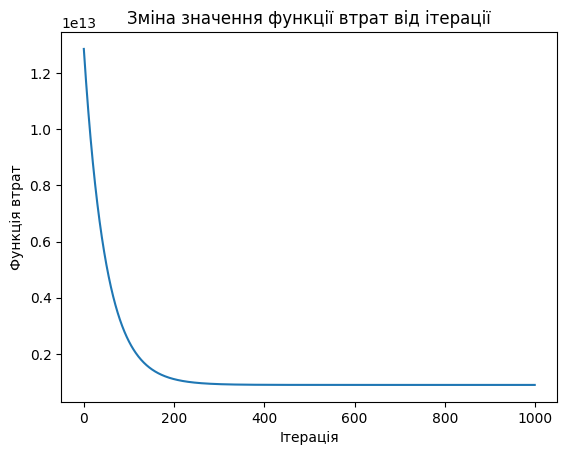

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Housing.csv')

X = data[['area', 'bedrooms', 'bathrooms']].values
y = data['price'].values

X = np.column_stack((np.ones(len(X)), X))

np.random.seed(0)
initial_w = np.random.rand(X.shape[1])

alpha = 0.01
iterations = 1000

def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm

X_norm = feature_normalize(X[:, 1:])

X_norm = np.column_stack((np.ones(len(X_norm)), X_norm))

cost_history = []
for i in range(iterations):
    initial_w = gradient_descent_step(initial_w, X_norm, y, alpha)
    cost = compute_cost(initial_w, X_norm, y)
    cost_history.append(cost)

print("Найкращі параметри w:", initial_w)

plt.plot(cost_history)
plt.xlabel('Ітерація')
plt.ylabel('Функція втрат')
plt.title('Зміна значення функції втрат від ітерації')
plt.show()

знайдіть ці ж параметри за допомогою аналітичного рішення;

In [30]:
def normal_equation(X, y):
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

optimal_w = normal_equation(X_norm, y)
print("Оптимальні параметри w:", optimal_w)

Оптимальні параметри w: [4766729.24770642  821214.14349519  299983.57107963  695808.52272538]


для перевірки спрогнозованих значень, використайте LinearRegression з бібліотеки scikit-learn та порівняйте результати.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(X_norm, y)

sklearn_w = np.append(model.intercept_, model.coef_[1:])

y_pred_sklearn = model.predict(X_norm)

mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print("Коефіцієнти регресії:", sklearn_w)
print("MSE:", mse_sklearn)

Коефіцієнти регресії: [4766729.24770642  821214.14349519  299983.57107963  695808.52272537]
MSE: 1791170049977.319
